In [1]:
from penis_detect import detecting_shit as ds
import cv2
import random
%matplotlib inline 
from matplotlib import pyplot as plt
import time 

In [2]:
# this is probably reinventing the wheel but im too lazy
def draw_bboxes(img, input_json):
    for anno in input_json['shapes']:
        ptsarr = anno['points']
        color = (random.randint(0,255), random.randint(0,255), 128)
        plotted = cv2.rectangle(img, (int(ptsarr[0][0]),int(ptsarr[0][1])),(int(ptsarr[1][0]),int(ptsarr[1][1])) , color, 1)
        img = plotted
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img, interpolation='nearest')
    plt.show()

1.1776232719421387


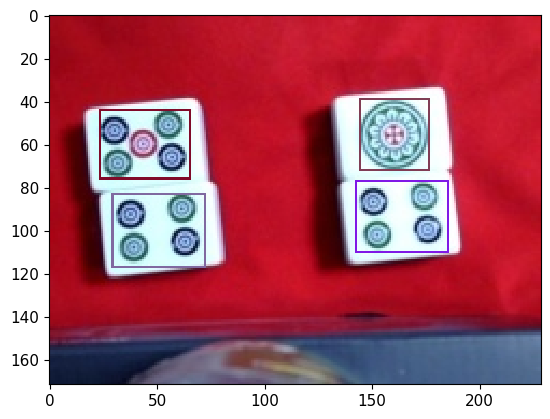

{'version': '5.1.1',
 'flags': {},
 'shapes': [{'label': '5',
   'points': [[23.0, 44.0], [65.0, 76.0]],
   'confidence': '0.51220703125',
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': '4',
   'points': [[142.0, 77.0], [185.0, 110.0]],
   'confidence': '0.9267578125',
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': '4',
   'points': [[29.0, 83.0], [72.0, 117.0]],
   'confidence': '0.93798828125',
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': '1',
   'points': [[144.0, 39.0], [176.0, 72.0]],
   'confidence': '0.943359375',
   'shape_type': 'rectangle',
   'flags': {}}],
 'imageHeight': 172,
 'imageWidth': 229}

In [8]:
MODEL_PATH = "C:\\auto_label\\detect-models\\28Detectv1.13_300x300.pt"
DEVICE = int("0")
CONFIDENCE = 0.5
IMAGE_PATH = "C:\\card_localization\\smol\\fullImage-1683001833726.jpeg"
def get_single_det(img):
    t1 = time.time()
    result = ds.ClassifyShit(IMAGE_PATH).detect_from_model(MODEL_PATH, DEVICE, CONFIDENCE)
    print(time.time() - t1)
    pic = draw_bboxes(cv2.imread(IMAGE_PATH) ,result)
    return result
get_single_det(IMAGE_PATH)